<a href="https://colab.research.google.com/github/Rakin003/Rakin_Code_Workshop/blob/main/EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_path = '/content/drive/MyDrive/chicken_dataset/Resized_Augmented_Dataset.zip'
extract_to = '/content/chicken_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input

# STEP 3: Set Directory Path
data_path = '/content/chicken_dataset/train(Resized_Augmented)'

# STEP 4: Data Preprocessing
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# STEP 5: Build EfficientNetB0 Model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=img_size + (3,))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# STEP 6: Compile the Model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# STEP 7: Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Found 4040 images belonging to 10 classes.
Found 1010 images belonging to 10 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 67s 338ms/step - accuracy: 0.5876 - loss: 1.2963 - val_accuracy: 0.9653 - val_loss: 0.2049
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.9369 - loss: 0.2586 - val_accuracy: 0.9733 - val_loss: 0.1316
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.9638 - loss: 0.1561 - val_accuracy: 0.9762 - val_loss: 0.1167
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.9776 - loss: 0.0956 - val_accuracy: 0.9772 - val_loss: 0.1029
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.9854 - loss: 0.0746 - val_accuracy: 0.9812 - val_loss: 0.0856
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9938 - loss: 0.0447 - val_accuracy: 0.9723 - val_loss: 0.0888
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.9933 - loss: 0.0418 - val_accuracy: 0.9792 - val_loss: 0.0832
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9931 - loss: 0

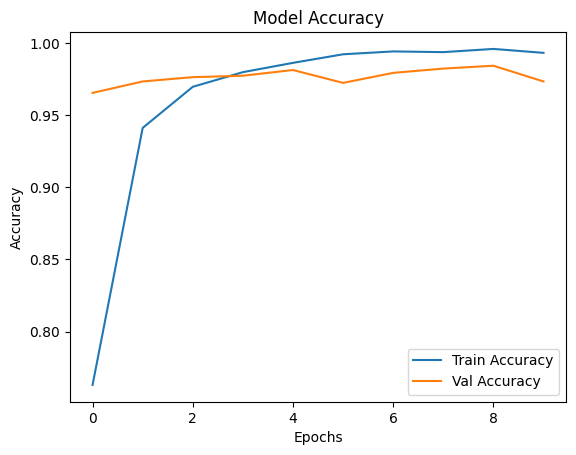

[0.7631188035011292, 0.9410890936851501, 0.9695544838905334, 0.9797029495239258, 0.986138641834259, 0.9920791983604431, 0.9940593838691711, 0.9935643672943115, 0.9957920908927917, 0.9930692911148071]
[0.9653465151786804, 0.9732673168182373, 0.9762375950813293, 0.9772277474403381, 0.9811881184577942, 0.9722772240638733, 0.9792079329490662, 0.9821782112121582, 0.9841583967208862, 0.9732673168182373]


In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
print(history.history['accuracy'])
print(history.history['val_accuracy'])

In [7]:
model.save('/content/chicken_efficientnetb0_model.h5')